## Identification of COVID-19 using Convolutional Neural Network

We know that performing RTPCR to detect COVID is risky because the swab tests reach the throat via the nose which results in coughing and thus spreads virus particles into the air thereby putting the life of health workers at risk. Hence, CT scans are much safer than such swab tests, according to researchers. Besides, performing a CT scan test after the RTPCR test for a COVID-positive patient is recommended.

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

# Image Pre-Processing

Here, we just reshape all the images to the desired size(100×100 in this project) and divide them by 255 as a step of normalization.

In [ ]:
IMAGE_SIZE = (100,100)
path="/content/drive/MyDrive/Identification of COVID-19/"
data=[]
c=0
for folder in os.listdir(path):
    sub_path=path+"/"+folder
    for folder2 in os.listdir(sub_path):
      sub_path2=sub_path+"/"+folder2
      for img in os.listdir(sub_path2):
        image_path=sub_path2+"/"+img        
        img_arr=cv2.imread(image_path)
        try:
          img_arr=cv2.resize(img_arr,IMAGE_SIZE)
          data.append(img_arr)
        except Exception as e:
          print(e)
          c+=1
          continue
print(f"To avoid some error {c} image are skipped")

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

To avoid some error 2 image are skipped


In [ ]:
x=np.array(data)
x=x/255.0               # normalization of the images

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
dataset = datagen.flow_from_directory(path, target_size = IMAGE_SIZE, batch_size = 32, class_mode = 'sparse')

Found 4171 images belonging to 3 classes.


In [ ]:
dataset.class_indices

{'Covid': 0, 'Healthy': 1, 'Others': 2}

In [ ]:
y=dataset.classes
y.shape

(4171,)

## Train-Test-Val split
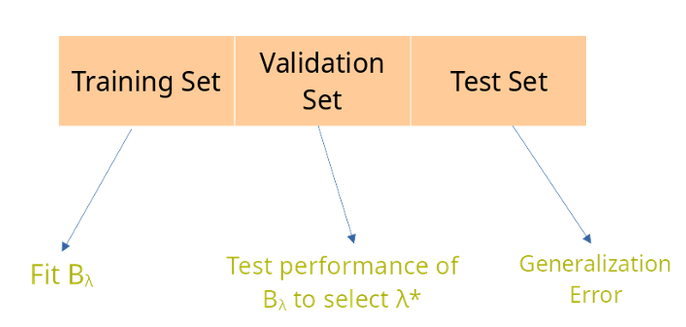

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
print(f"""
Train: {x_train.shape,y_train.shape}
Validation: {x_val.shape, y_val.shape}
Test: {x_test.shape, y_test.shape}
""")


Train: ((3002, 100, 100, 3), (3002,))
Validation: ((751, 100, 100, 3), (751,))
Test: ((418, 100, 100, 3), (418,))



# Model Building

In [ ]:
model=Sequential()

#covolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))

#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(32,(3,3),activation='relu'))

#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))

#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))

#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#i/p layer
model.add(Flatten())

#o/p layer
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 49, 49, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                        

In [ ]:
#compile model:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Early Stopping

Early Stopping allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving. This is done as we don’t know how many epochs our model must be trained for

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=30,callbacks=[early_stop],shuffle=True)

Epoch 1/30
94/94 [==============================] - 12s 28ms/step - loss: 0.9469 - accuracy: 0.5983 - val_loss: 1.0193 - val_accuracy: 0.5406
Epoch 2/30
94/94 [==============================] - 2s 21ms/step - loss: 0.6052 - accuracy: 0.7518 - val_loss: 1.0491 - val_accuracy: 0.5246
Epoch 3/30
94/94 [==============================] - 2s 21ms/step - loss: 0.4826 - accuracy: 0.8118 - val_loss: 1.2817 - val_accuracy: 0.2956
Epoch 4/30
94/94 [==============================] - 2s 21ms/step - loss: 0.3651 - accuracy: 0.8688 - val_loss: 1.0035 - val_accuracy: 0.5712
Epoch 5/30
94/94 [==============================] - 2s 21ms/step - loss: 0.2555 - accuracy: 0.9171 - val_loss: 0.8347 - val_accuracy: 0.6391
Epoch 6/30
94/94 [==============================] - 2s 21ms/step - loss: 0.1595 - accuracy: 0.9570 - val_loss: 1.1559 - val_accuracy: 0.6099
Epoch 7/30
94/94 [==============================] - 2s 21ms/step - loss: 0.1016 - accuracy: 0.9827 - val_loss: 0.6148 - val_accuracy: 0.7670
Epoch 8/30
9

## Loss graph


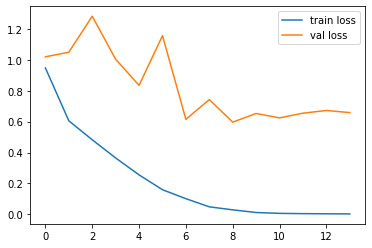

In [ ]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

## Accuracies

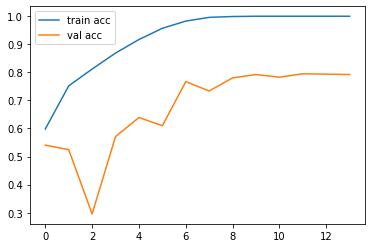

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

## Classification report and confusion matrix for the validation dataset

In [ ]:
y_val_pred=model.predict(x_val)
y_val_pred=np.argmax(y_val_pred,axis=1)
print(classification_report(y_val_pred,y_val))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       410
           1       0.55      0.63      0.59       111
           2       0.76      0.75      0.76       230

    accuracy                           0.79       751
   macro avg       0.73      0.75      0.74       751
weighted avg       0.80      0.79      0.79       751



In [ ]:
confusion_matrix(y_val_pred,y_val)

array([[353,  31,  26],
       [ 14,  70,  27],
       [ 32,  26, 172]])

## Classification report and confusion matrix for the test dataset

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       232
           1       0.67      0.72      0.69        71
           2       0.78      0.78      0.78       115

    accuracy                           0.83       418
   macro avg       0.79      0.80      0.79       418
weighted avg       0.84      0.83      0.84       418



In [ ]:
confusion_matrix(y_pred,y_test)

array([[208,  10,  14],
       [  9,  51,  11],
       [ 10,  15,  90]])

## Predict Disease

While splitting Dataset we split our dataset in "Training Set", "Validation Set", "Test Set". "Training Set" and "Validation Set" are used to make our model, checking accuracy etc. Now we will take images from test dataset for prediction

In [ ]:
def get_name(res):
  try:
    return dict([(value, key) for key, value in dataset.class_indices.items()])[np.argmax(res,axis=1)[0]]
  except:
    return dict([(value, key) for key, value in dataset.class_indices.items()])[res]

def test(num):
  img = x_test[num]
  x = np.expand_dims(img,axis=0)
  res = model.predict(x)
  print("Predicted:",get_name(res))
  print("Real:",get_name(y_test[num]))
  plt.imshow(img)
  plt.show()
  if get_name(res)==get_name(y_test[num]):
    print("Correctly predicted")
  else:
    print("Incorrectly Predicted")


Predicted: Healthy
Real: Healthy


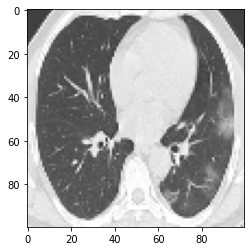

Correctly predicted


In [ ]:
test(0)

Predicted: Others
Real: Others


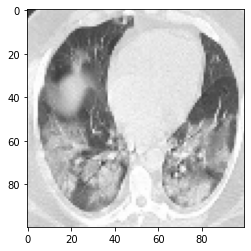

Correctly predicted


In [ ]:
test(1)

Predicted: Healthy
Real: Others


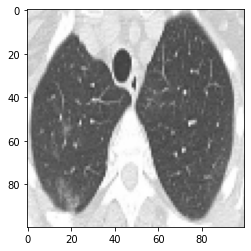

Incorrectly Predicted


In [ ]:
test(2)

Predicted: Covid
Real: Covid


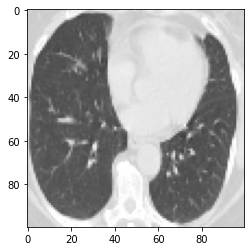

Correctly predicted


In [ ]:
test(3)

Predicted: Covid
Real: Covid


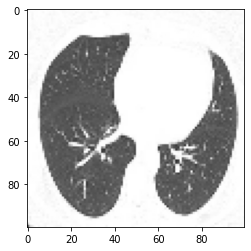

Correctly predicted


In [ ]:
test(4)

### Reference
https://www.analyticsvidhya.com/blog/2021/12/cnn-model-covid-19/